<a href="https://colab.research.google.com/github/oltsaaa/Python/blob/main/Restaurant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Вилучення даних та об'єднання:**
**Мета**: витягти дані з трьох окремих таблиць та об'єднати їх в один файл формату .csv.

**Кроки**:

*   Завантажити дані з трьох таблиць.
*   Об'єднати дані в один файл та зберегти його у форматі .csv.
*   Прочитати об'єднаний файл за допомогою бібліотеки pandas, щоб створити єдиний DataFrame.


**Перевірка**: DataFrame повинен містити **74,818** рядків для підтвердження правильності даних.

**Результат**: єдиний DataFrame слугуватиме основою для подальшого аналізу та візуалізації в наступних завданнях.

In [ ]:

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MateColab

/content/drive/MyDrive/MateColab


In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
# Підключення до бази даних
con = sqlite3.connect('db.sqlite3')

# Отримання списку таблиць
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = con.execute(query).fetchall()

# Закриття з'єднання
con.close()

# Виведення назв таблиць
print("Таблиці у базі даних:", [table[0] for table in tables])



Таблиці у базі даних: ['sqlite_sequence', 'restaurant_orderitem', 'restaurant_product', 'restaurant_order']


In [ ]:

con = sqlite3.connect('db.sqlite3')

# Function to retrieve the structure of a table
def get_table_structure(table_name):
    query = f"PRAGMA table_info({table_name});"
    return con.execute(query).fetchall()

sqlite_sequence_structure = get_table_structure("sqlite_sequence_structure")
orderitem_structure = get_table_structure("restaurant_orderitem")
product_structure = get_table_structure("restaurant_product")
order_structure = get_table_structure("restaurant_order")


con.close()

sqlite_sequence_structure, orderitem_structure, product_structure, order_structure


([],
 [(0, 'id', 'INTEGER', 1, None, 1),
  (1, 'quantity', 'INTEGER', 1, None, 0),
  (2, 'order_id', 'bigint', 1, None, 0),
  (3, 'product_id', 'bigint', 1, None, 0)],
 [(0, 'id', 'INTEGER', 1, None, 1),
  (1, 'price', 'decimal', 1, None, 0),
  (2, 'name', 'varchar(100)', 1, None, 0)],
 [(0, 'id', 'INTEGER', 1, None, 1), (1, 'datetime', 'datetime', 1, None, 0)])

In [ ]:
con = sqlite3.connect('db.sqlite3')

query = """
SELECT
  roi.id
  , roi.quantity
  , rp.price
  , rp.name
  , ro.datetime
FROM restaurant_orderitem  roi
JOIN restaurant_product rp
ON roi.product_id = rp.id
JOIN restaurant_order ro
ON roi.order_id = ro.id

"""


read_myquery = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Save the DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/MateColab/read_myquery.csv'
read_myquery.to_csv(output_csv_path, index=False)

# Check the number of rows in the DataFrame
read_myquery.shape[0], output_csv_path

(74818, '/content/drive/MyDrive/MateColab/read_myquery.csv')

In [ ]:
data = pd.read_csv("read_myquery.csv")
data.head()

,id,quantity,price,name,datetime
0,1,2,0.80,Plain Papadum,2019-08-03 20:25:00
1,2,1,12.95,King Prawn Balti,2019-08-03 20:25:00
2,3,1,2.95,Garlic Naan,2019-08-03 20:25:00
3,4,1,3.95,Mushroom Rice,2019-08-03 20:25:00
4,5,1,8.95,Paneer Tikka Masala,2019-08-03 20:25:00


2. **Топ-10 найпопулярніших продуктів за кількістю:**

**Мета**: визначити 10 найпопулярніших продуктів ресторану за кількістю проданих одиниць.

**Кроки**:


*   Підрахувати, скільки разів кожен продукт був проданий.
*   Визначити 10 найпопулярніших продуктів на основі кількості проданих одиниць.
*   Створити кругову діаграму, що відображає відсоткову популярність цих топ-10 продуктів.

**Результат**: ця діаграма допоможе візуалізувати, які продукти найчастіше купують у ресторані.

In [ ]:
grouped_by_product = data.groupby("name")["quantity"].sum().reset_index()
top_10 = grouped_by_product.sort_values( by = "quantity", ascending= False).head(10)
top_10


,name,quantity
188,Plain Papadum,10648
186,Pilau Rice,6367
187,Plain Naan,4983
81,Garlic Naan,3318
189,Plain Rice,2964
165,Onion Bhajee,2749
144,Mango Chutney,2504
52,Chicken Tikka Masala,2473
26,Chapati,1935
153,Mint Sauce,1840


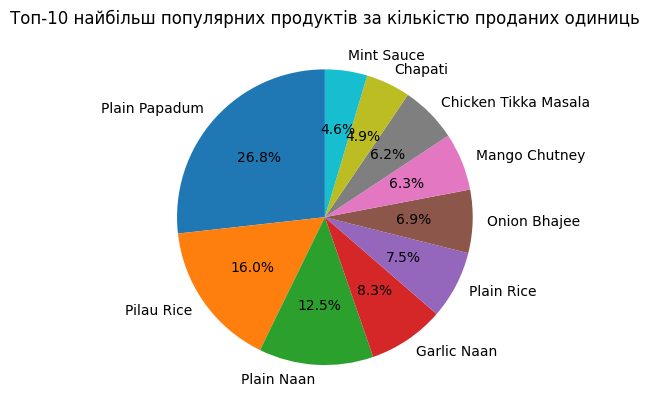

In [ ]:
plt.pie(top_10['quantity'], labels=top_10['name'], autopct='%1.1f%%', startangle=90, )
plt.title('Топ-10 найбільш популярних продуктів за кількістю проданих одиниць')
plt.show()


3. **Топ-10 найприбутковіших продуктів за ціною одиниці:**

**Мета**: розрахувати, які продукти приносять найбільший дохід (топ-10) ресторану.

**Кроки**:

  * Розрахувати item_price для кожного продукту в кожному замовленні, множачи price * quantity.
  * Підсумувати загальну ціну одиниці для кожного продукту.
  * Визначити 10 продуктів, що приносять найбільший дохід.
  * Створити кругову діаграму, яка відображає відсотковий вклад цих топ-10 продуктів у дохід.

**Результат**: ця діаграма покаже, які продукти приносять найбільший дохід для ресторану, що може відрізнятися від продуктів, що продаються найбільше.

In [ ]:
data["revenue"] = data["price"] * data["quantity"]
grouped_by_price = data.groupby("name")["revenue"].sum().reset_index()
price_10 = grouped_by_price.sort_values( by = "revenue", ascending= False).head(10)
price_10

,name,revenue
52,Chicken Tikka Masala,22133.35
186,Pilau Rice,18782.65
187,Plain Naan,12955.80
97,Korma,12261.50
16,Bombay Aloo,10894.45
165,Onion Bhajee,10858.55
20,Butter Chicken,10626.60
81,Garlic Naan,9788.10
98,Korma - Chicken,9764.45
189,Plain Rice,8743.80


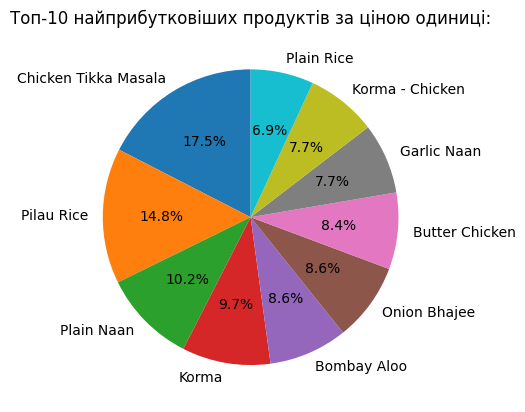

In [ ]:
plt.pie(price_10['revenue'], labels=price_10['name'], autopct='%1.1f%%', startangle=90, )
plt.title('Топ-10 найприбутковіших продуктів за ціною одиниці:')
plt.show()

4. **Аналіз доходу за годинами:**

**Мета**: проаналізувати загальний дохід ресторану залежно від часу, коли були зроблені замовлення.

Кроки:
 * Виділити годину з поля datetime (значення від 0 до 23).
 * Підрахувати загальний дохід за кожну годину (сума вартості замовлень).
 * Створити стовпчикову діаграму, де:
     * На осі X: Години дня (0-23).
     * На осі Y: Загальний дохід за кожну годину.

**Результат**: це дасть уявлення про те, які години є найбільш прибутковими для ресторану, допомагаючи зрозуміти поведінку клієнтів протягом дня.

In [ ]:
data["datetime"] = pd.to_datetime(data["datetime"], format="%Y-%m-%d %H:%M:%S")



In [ ]:
data['hour'] = data['datetime'].dt.hour

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        74818 non-null  int64         
 1   quantity  74818 non-null  int64         
 2   price     74818 non-null  float64       
 3   name      74818 non-null  object        
 4   datetime  74818 non-null  datetime64[ns]
 5   revenue   74818 non-null  float64       
 6   hour      74818 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(1)
memory usage: 3.7+ MB


In [ ]:
data.head()

,id,quantity,price,name,datetime,revenue,hour
0,1,2,0.80,Plain Papadum,2019-08-03 20:25:00,1.60,20
1,2,1,12.95,King Prawn Balti,2019-08-03 20:25:00,12.95,20
2,3,1,2.95,Garlic Naan,2019-08-03 20:25:00,2.95,20
3,4,1,3.95,Mushroom Rice,2019-08-03 20:25:00,3.95,20
4,5,1,8.95,Paneer Tikka Masala,2019-08-03 20:25:00,8.95,20


In [ ]:
revenue_by_hour = data.groupby("hour")["revenue"].sum()
revenue_by_hour

,revenue
hour,
0,177.95
1,54.65
2,199.25
3,8.90
4,63.45
5,57.40
6,121.60
8,447.70
9,570.60


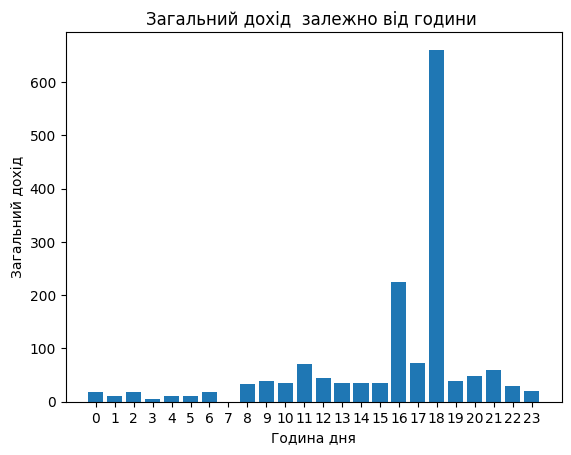

In [ ]:
plt.bar(data["hour"], data["revenue"])
plt.title('Загальний дохід  залежно від години ')
plt.xlabel('Година дня')
plt.ylabel('Загальний дохід')
plt.xticks(range(24))
plt.show()

5. **Аналіз доходу за днями тижня:**

**Мета**: проаналізувати загальний дохід ресторану залежно від дня тижня, коли були зроблені замовлення.

Кроки:

 * Виділити день тижня з поля datetime (від понеділка до неділі).
 * Підрахувати загальний дохід за кожен день тижня.
 * Створити стовпчикову діаграму, де:
     * На осі X: Дні тижня (від понеділка до неділі).
     * На осі Y: Загальний дохід за кожен день.

**Результат**: ця діаграма допоможе визначити, які дні тижня приносять найбільший дохід, що може бути корисним для планування персоналу, акцій чи розкладу.

In [ ]:
data['weekday'] = data['datetime'].dt.dayofweek
days_of_week = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'П’ятниця', 'Субота', 'Неділя']
data['weekday'] = data['weekday'].apply(lambda x: days_of_week[x])

revenue_by_day = data.groupby("weekday")["revenue"].sum()
revenue_by_day

,revenue
weekday,
Вівторок,38145.65
Неділя,67105.95
Понеділок,40008.30
П’ятниця,100339.15
Середа,41246.20
Субота,112191.65
Четвер,46021.55


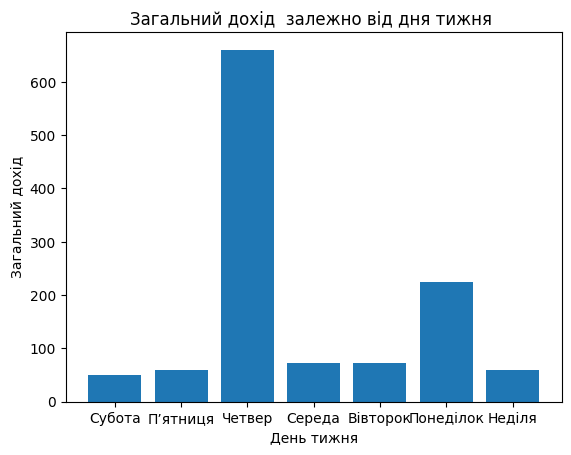

In [ ]:
plt.bar(data["weekday"], data["revenue"])
plt.title('Загальний дохід  залежно від дня тижня ')
plt.xlabel('День тижня')
plt.ylabel('Загальний дохід')
plt.show()